In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [110]:
dd = pd.read_csv('uo_nn_batch_123456-789101.csv', sep=";")
dd.columns = dd.columns.str.replace(' ', '')

# convert Lk from string to np.array, separated by comma
dd['Lk'] = dd['Lk'].apply(lambda x: np.array(x.split(','), dtype=float))

dd.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Lk
0,1,0.00,1,75,0.1451,100.0,100.0,5.720000e-07,"[0.25, 0.1499, 0.064969, 0.011787, 0.0099654, ..."
1,1,0.00,3,6,0.0255,100.0,100.0,2.910000e-50,"[0.25, 0.1499, 0.064875, 0.011376, 0.00016025,..."
2,1,0.00,7,125000,1.5989,100.0,100.0,1.410000e-05,"[0.0014478, 0.00028407, 0.00032773, 0.00018276..."
3,1,0.01,1,58,0.1139,100.0,100.0,2.760000e-02,"[0.25, 0.15049, 0.067696, 0.02936, 0.028303, 0..."
4,1,0.01,3,45,0.1261,100.0,100.0,2.760000e-02,"[0.25, 0.15049, 0.067594, 0.028833, 0.028378, ..."


In [111]:
def show_heatmap(df, isd, val, log:bool = False):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        if log:
            t = np.log(t)
        sns.heatmap(t, annot=True, fmt=".1f", linewidths=.5)

def plot_val(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(1, 11):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)

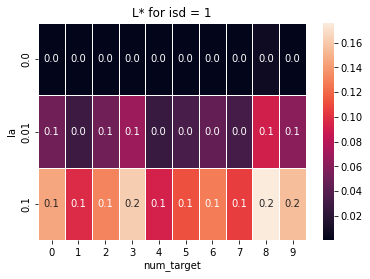

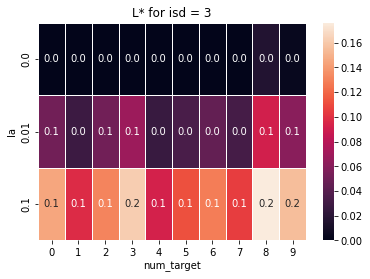

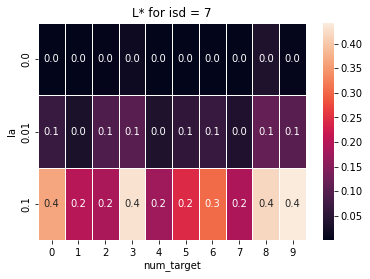

In [112]:
# show heatmaps for isd = 1, 3, 7
par = 'L*'
for i in [1, 3, 7]:
    show_heatmap(dd, i, par)
    plt.title(f'{par} for isd = ' + str(i))
    plt.show()

0    [0.25, 0.1499, 0.064969, 0.011787, 0.0099654, ...
Name: Lk, dtype: object
3    [0.25, 0.15049, 0.067696, 0.02936, 0.028303, 0...
Name: Lk, dtype: object


KeyError: 0

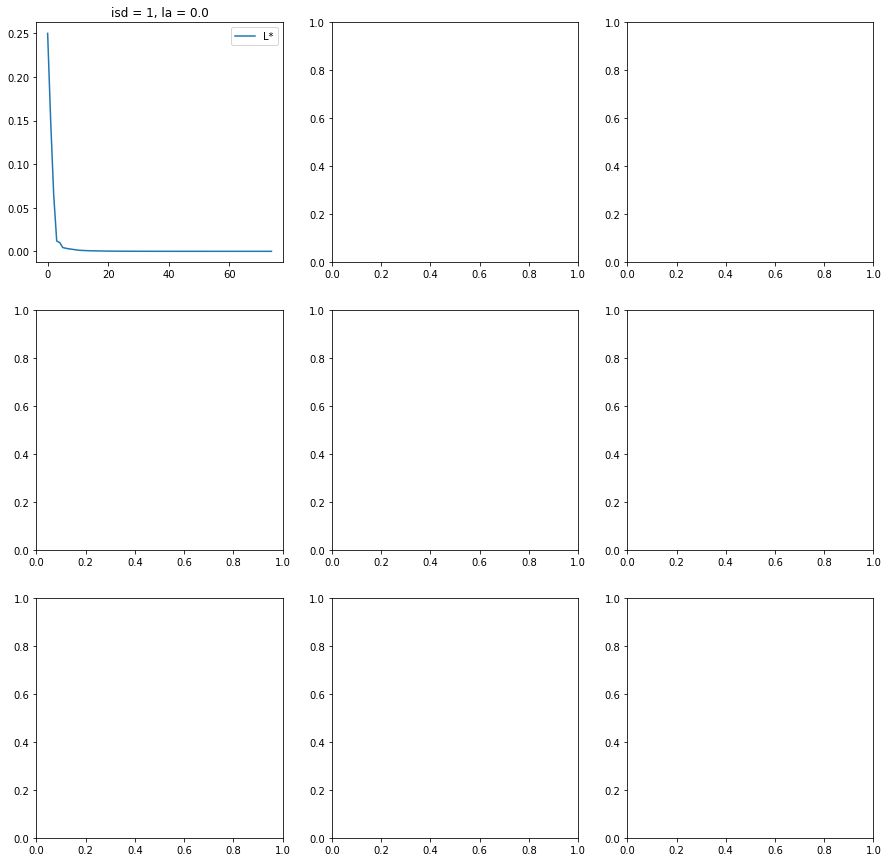

In [127]:
num_target = 1  
isd = 7
la = 0.0

# plot for every isd and la
# show plots in a grid 3*3
fig, axs = plt.subplots(len(dd['isd'].unique()), len(dd['la'].unique()), figsize=(15, 15))
for i, isd in enumerate(dd['isd'].unique()):
    for j, la in enumerate(dd['la'].unique()):
        t = dd[(dd['isd'] == isd) & (dd['la'] == la) & (dd['num_target'] == num_target)]
        print(t['Lk'])
        axs[i, j].plot(t['Lk'][0], label='L*')
        axs[i, j].set_title(f'isd = {isd}, la = {la}')
        axs[i, j].legend()